In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point, LineString
import shapely as shp
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.lines as mlines
import numpy as np
from matplotlib.markers import MarkerStyle
from matplotlib.transforms import Affine2D
from pyfonts import load_font

In [2]:
subtitle_font = load_font('/home/kbt28/.local/share/fonts/texgyreheros-bold.otf')
subtitle_font.set_size(10)
zone_label_font = load_font('/home/kbt28/.local/share/fonts/texgyreheros-bold.otf')
zone_label_font.set_size(8)
legend_font = load_font('/home/kbt28/.local/share/fonts/texgyreheros-regular.otf')
legend_font.set_size(10)

In [3]:
# load zone gdf and assign COLOR
zone_zipfile = "NYISO_Load_Zone.zip"
zones = gpd.read_file(zone_zipfile)
zones.loc[zones['ZN_ABBRV'] == 'CAPITL', 'COLOR'] = 1.0 # F
zones.loc[zones['ZN_ABBRV'] == 'CENTRL', 'COLOR'] = 1.0 # C 
zones.loc[zones['ZN_ABBRV'] == 'DUNWOD', 'COLOR'] = 1.0 # I
zones.loc[zones['ZN_ABBRV'] == 'GENESE', 'COLOR'] = 3.0 # B
zones.loc[zones['ZN_ABBRV'] == 'HUD VL', 'COLOR'] = 3.0 # G
zones.loc[zones['ZN_ABBRV'] == 'LONGIL', 'COLOR'] = 2.0 # K
zones.loc[zones['ZN_ABBRV'] == 'MILLWD', 'COLOR'] = 2.0 # H
zones.loc[zones['ZN_ABBRV'] == 'MHK VL', 'COLOR'] = 2.0 # E
zones.loc[zones['ZN_ABBRV'] == 'N.Y.C.', 'COLOR'] = 3.0 # J
zones.loc[zones['ZN_ABBRV'] == 'NORTH', 'COLOR']  = 3.0 # D
zones.loc[zones['ZN_ABBRV'] == 'WEST', 'COLOR']   = 2.0 # A

zones.set_crs(epsg=4326, inplace=True)

zones_val_to_color = {
    1.0: '#a3c6d2',
    2.0: '#c8a2c8',
    3.0: '#b5c9a5'
}
zones['COLOR'] = zones['COLOR'].map(zones_val_to_color)
zones = zones.dissolve(by="ZN_ABBRV", as_index=False);

In [4]:
# load all line info
line_zipfile = "NYloadmap.zip"
all_lines_df = gpd.read_file(line_zipfile)

# load CLCPA line info
lines_df = pd.read_csv('branches.csv')
lines_df.drop(['id'], axis=1, inplace=True)
lines_df = pd.concat([lines_df, pd.read_csv('dclines.csv')], axis=0, ignore_index=True)

In [5]:
# build bus gdf
buses_df = pd.read_csv('bus_ids.csv')

# bus coords come from all_lines_df
def add_bus(row):
    df = all_lines_df.loc[all_lines_df['bus1_idx'] == row['extern_id']]
    if df.shape[0] == 0:
        df = all_lines_df.loc[all_lines_df['bus2_idx'] == row['extern_id']]
        return Point([df['bus2_xcoor'].values[0], df['bus2_ycoor'].values[0]])
    
    return Point([df['bus1_xcoor'].values[0], df['bus1_ycoor'].values[0]])

buses_df['geometry'] = buses_df.apply(lambda row: add_bus(row), axis=1)

# manual adjustments for better visualization
buses_df.loc[buses_df['extern_id'] == 39, 'geometry'] = Point([-73.9, 41.8])
buses_df.loc[buses_df['extern_id'] == 40, 'geometry'] = Point([-73.966, 42.66])
buses_df.loc[buses_df['extern_id'] == 48, 'geometry'] = Point([-74.22, 44.925])
buses_df.loc[buses_df['extern_id'] == 49, 'geometry'] = Point([-74.0, 44.699])
buses_df.loc[buses_df['extern_id'] == 52, 'geometry'] = Point([-77.582, 43.175])
buses_df.loc[buses_df['extern_id'] == 53, 'geometry'] = Point([-77.482, 43.006])
buses_df.loc[buses_df['extern_id'] == 56, 'geometry'] = Point([-78.743, 43.25])
buses_df.loc[buses_df['extern_id'] == 57, 'geometry'] = Point([-78.975, 42.98])
buses_df.loc[buses_df['extern_id'] == 58, 'geometry'] = Point([-79.033, 42.614])
buses_df.loc[buses_df['extern_id'] == 59, 'geometry'] = Point([-78.797, 42.45])
buses_df.loc[buses_df['extern_id'] == 62, 'geometry'] = Point([-78.055, 42.508])
buses_df.loc[buses_df['extern_id'] == 66, 'geometry'] = Point([-76.612, 42.15])
buses_df.loc[buses_df['extern_id'] == 67, 'geometry'] = Point([-77.1, 42.1])
buses_df.loc[buses_df['extern_id'] == 68, 'geometry'] = Point([-76.814, 42.25])
buses_df.loc[buses_df['extern_id'] == 69, 'geometry'] = Point([-75.417, 42.092])
buses_df.loc[buses_df['extern_id'] == 70, 'geometry'] = Point([-75.988, 42.05])
buses_df.loc[buses_df['extern_id'] == 71, 'geometry'] = Point([-76.009, 42.33])
buses_df.loc[buses_df['extern_id'] == 74, 'geometry'] = Point([-73.799, 41.234])
buses_df.loc[buses_df['extern_id'] == 75, 'geometry'] = Point([-74.5, 41.37])
buses_df.loc[buses_df['extern_id'] == 76, 'geometry'] = Point([-74.261, 41.25])
buses_df.loc[buses_df['extern_id'] == 78, 'geometry'] = Point([-73.789, 41.025])
buses_df.loc[buses_df['extern_id'] == 79, 'geometry'] = Point([-73.414, 40.739])
buses_df.loc[buses_df['extern_id'] == 81, 'geometry'] = Point([-73.965, 40.64])
buses_df.loc[buses_df['extern_id'] == 124, 'geometry'] = Point([-74.4, 40.8])
buses_df.loc[buses_df['extern_id'] == 134, 'geometry'] = Point([-77.592, 41.5])
buses_df.loc[buses_df['extern_id'] == 132, 'geometry'] = Point([-77.0, 41])

buses_gdf = gpd.GeoDataFrame(buses_df, geometry='geometry')
buses_gdf.set_crs(epsg=4326, inplace=True);

In [6]:
# build line gdf
def add_line(row):
    fbus = buses_gdf.loc[buses_gdf['extern_id'] == row['fbus_extern'], 'geometry'].values[0]
    tbus = buses_gdf.loc[buses_gdf['extern_id'] == row['tbus_extern'], 'geometry'].values[0]
    return LineString([fbus, tbus])

lines_df['geometry'] = lines_df.apply(lambda row: add_line(row), axis=1)
lines_gdf = gpd.GeoDataFrame(lines_df, geometry='geometry')
lines_gdf.set_crs(epsg=4326, inplace=True);

In [7]:
# load IF flow
if_df = pd.read_csv('if_map.csv')
if_df['branch'] = np.abs(if_df['branch'])

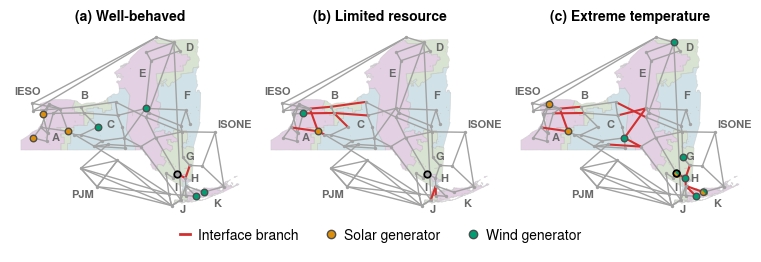

In [8]:
# plot
scens = [(140, 2012), (69, 2011), (290, 2002)]
scen_titles = ["(a) Well-behaved", "(b) Limited resource", "(c) Extreme temperature"]
job_id = 107980

gen_color = {"Wind": '#019e73', "SolarUPV": '#dc8f0b', "Import": '#9566ba'}

zone_id = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "ISONE", "PJM", "IESO"]
zone_label_coords = [(-78.65, 42.25), # A
                     (-77.6, 43.4), # B
                     (-76.65, 42.6), # C
                     (-73.8, 44.699), # D
                     (-75.5, 44.0), # E
                     (-73.9, 43.4), # F
                     (-73.8, 41.75), # G
                     (-73.62, 41.15), # H
                     (-74.2, 40.9), # I
                     (-74, 40.3), # J
                     (-72.8, 40.45), # K
                     (-72.65, 42.6), # NE
                     (-77.95, 40.7), # PJM
                     (-80, 43.5) # IESO
]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(7.5, 2.5), layout="constrained")
for i, ax in enumerate(axs):
    # identify flagged IFs
    if_te_res = pd.read_csv(f"if_flow_res_s{scens[i][0]}_{scens[i][1]}_{job_id}.csv")
    if_idx = np.nonzero(if_te_res['wls_pvalue'] < 0.05)[0]
    line_idx = if_df[if_df['if_id'].isin(if_idx+1)]['branch']-1
    if_line_flag = lines_gdf.loc[line_idx]
    if_line_other = lines_gdf.drop(line_idx)

    # identify flagged gens
    curtail_te_res = pd.read_csv(f"curtail_res_s{scens[i][0]}_{scens[i][1]}_{job_id}.csv")
    bus_flag = pd.DataFrame({'intern_id': curtail_te_res.loc[curtail_te_res['wls_pvalue'] < 0.05, 'bus_intern'].values, 
                             'type': curtail_te_res.loc[curtail_te_res['wls_pvalue'] < 0.05, 'type'].values})
    bus_flag.drop_duplicates(inplace=True, ignore_index=True)
    bus_flag_pivot = bus_flag.assign(value=1).pivot_table(index="intern_id", columns="type", values="value", fill_value=0).reset_index()
    bus_flag_types = bus_flag_pivot.drop(columns=['intern_id']).apply(lambda row: list(row.index[row > 0.0]), axis=1)
    bus_other = buses_gdf.loc[~buses_gdf['intern_id'].isin(bus_flag_pivot['intern_id'])]
    bus_target = buses_gdf.loc[buses_gdf['intern_id'] == 44]

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    ax.set_title(scen_titles[i], loc='center', font=subtitle_font)
    zones.plot(ax=ax, color=zones['COLOR'], edgecolor='#c2c2c2', linewidth=0.5, zorder=1, alpha=0.5)
    if_line_other.plot(ax=ax, color='#a2a2a2', linewidth=1.0, zorder=2)
    if_line_flag.plot(ax=ax, color='#d32f2f', linewidth=1.5, zorder=3)
    bus_other.plot(ax=ax, markersize=2, color='#a2a2a2', zorder=4)
    bus_44_flag = False
    for i, row in bus_flag_pivot.iterrows():
        if row['intern_id'] == 44:
            bus_44_flag = True
        if len(bus_flag_types[i]) == 1:
            bus = buses_gdf.loc[buses_gdf['intern_id'] == row['intern_id']]
            bus.plot(ax=ax, markersize=22, color=gen_color[bus_flag_types[i][0]], zorder=4, edgecolor='#4d4d4d')
        else:
            bus = buses_gdf.loc[buses_gdf['intern_id'] == row['intern_id']]
            bus_coords = [shp.get_coordinates(bus['geometry'])[0][0], shp.get_coordinates(bus['geometry'])[0][1]]
            ax.plot(bus_coords[0], bus_coords[1], marker='o', markersize=5, markeredgecolor='none', markerfacecolor=gen_color[bus_flag_types[i][0]], zorder=4)
            ax.plot(bus_coords[0], bus_coords[1], marker=MarkerStyle('o', 'right', Affine2D().rotate_deg(45)), markersize=5, markeredgecolor='none', markerfacecolor=gen_color[bus_flag_types[i][1]], zorder=5)
            bus.plot(ax=ax, markersize=22, color='none', zorder=6, edgecolor='#4d4d4d')
    if bus_44_flag:
        bus_target.plot(ax=ax, markersize=22, facecolor='none', edgecolor='black', zorder=6, linewidth=1.25)
    else:
        bus_target.plot(ax=ax, markersize=22, facecolor='#a2a2a2', edgecolor='black', zorder=6, linewidth=1.25)
    
    for i, label in enumerate(zone_id):
        ax.annotate(label, xy=zone_label_coords[i], xycoords='data', color='#696969', font=zone_label_font)

# add legend
custom_handles = [
    mlines.Line2D([0], [0], color='#d32f2f', linewidth=2.0, label='Interface branch'),
    mlines.Line2D([0], [0], marker='o', color='none', markerfacecolor=gen_color['SolarUPV'], markeredgecolor='#4d4d4d', markersize=6, label='Solar generator'),
    mlines.Line2D([0], [0], marker='o', color='none', markerfacecolor=gen_color['Wind'], markeredgecolor='#4d4d4d', markersize=6, label='Wind generator'),
]
fig.legend(handles=custom_handles, 
           loc='lower center',
           ncol=3, 
           frameon=False, 
           alignment='left',
           labelspacing=0.6,
           borderpad=0.7,
           prop=legend_font,
           handlelength=0.7,
           handletextpad=0.6,
           bbox_to_anchor=(0.5, -0.05)
)
plt.savefig(f"map_pressure_points.png", dpi=300)